In this assignment, you will be implementing a binary image classifier with a neural network. You will only be graded for the code that you have written in each step of the process.

Download the dataset from this link: https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset/data

**Load the dataset into the computer memory.**

In [1]:
##### code here #####
import numpy as np
import cv2
import pandas as pd
import os
import matplotlib.pyplot as plt
import random

**Access any one image from the features variable and display it here using matplotlib.**

In [2]:
# ##### code here #####
# img = cv2.imread('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/1.jpg')

# # Load the image

# # Plot the image
# plt.imshow(img)

**Split the datset into train and test variables.**

In [4]:
##### code here #####
DIRECTORY=r'/kaggle/input/microsoft-catsvsdogs-dataset/PetImages'
CATEGORIES=['Cat','Dog']

In [5]:
data=[]
for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        if img_arr is None:
            print("Failed to load image:", img_path)
            continue  # Skip processing this image
        img_arr = cv2.resize(img_arr, (100, 100))
        data.append([img_arr,label])

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages\\Cat'

In [12]:
len(data)

24946

In [13]:
random.shuffle(data)

In [14]:
x=[]
y=[]

for features,label in data:
    x.append(features)
    y.append(label)

**Create and compile a neural network object using the Sequential class and populate the layers. You can look at the submissions in the data card to get a sense of viable model architectures. Display the model summary as well.**

In [15]:
x=np.array(x,dtype=float)
y=np.array(y,dtype=float)

In [16]:
x=x/255.0

In [17]:
x.shape

(24946, 100, 100, 3)

In [18]:
##### code here #####
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,AvgPool2D,Dropout,BatchNormalization
from sklearn.model_selection import train_test_split

2024-03-27 05:35:54.117846: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-27 05:35:54.117974: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-27 05:35:54.283990: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
# model=Sequential()
# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Flatten())
# model.add(Dense(128,input_shape=x.shape[1:],activation='relu'))
# model.add(Dense(2,activation='softmax'))

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [20]:
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, train_size = 0.3)

In [23]:
model=Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 98, 98, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 47, 47, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,490,561 (9.50 MB)

 Trainable params: 2,488,577 (9.49 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [24]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

**Fit the model for any number of epochs.**

In [25]:
##### code here #####
batch_size=32
cvd=model.fit(x_train, y_train, validation_data = (x_val, y_val),epochs = 10,batch_size=batch_size)

Epoch 1/10
  7/546 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.4576 - loss: 1.0690 

I0000 00:00:1711517857.979174      89 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1711517858.005076      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


546/546 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6198 - loss: 0.7760

W0000 00:00:1711517879.035922      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1711517880.522158      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


546/546 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.6198 - loss: 0.7758 - val_accuracy: 0.5933 - val_loss: 0.8350
Epoch 2/10
  9/546 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7590 - loss: 0.4936

W0000 00:00:1711517881.869506      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


546/546 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7456 - loss: 0.5193 - val_accuracy: 0.7764 - val_loss: 0.4748
Epoch 3/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8084 - loss: 0.4220 - val_accuracy: 0.7470 - val_loss: 0.5134
Epoch 4/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8340 - loss: 0.3719 - val_accuracy: 0.7862 - val_loss: 0.4697
Epoch 5/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8532 - loss: 0.3302 - val_accuracy: 0.8347 - val_loss: 0.3819
Epoch 6/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8771 - loss: 0.2848 - val_accuracy: 0.7648 - val_loss: 0.5909
Epoch 7/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8917 - loss: 0.2553 - val_accuracy: 0.8802 - val_loss: 0.2765
Epoch 8/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9032 - loss: 0.2343 - val_accuracy: 0.8784 - val_loss: 0.2837
Epoch 9/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9115 - loss: 0.2165 - val_accuracy: 0.880

**Evaluate the model using any appropriate metric; confusion matrix and accuracy/loss line plots are the most commonly used.**

In [26]:
##### code here #####
model.evaluate(x_test, y_test)

164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8461 - loss: 0.3534


W0000 00:00:1711518431.358053      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


[0.362749844789505, 0.8482534885406494]

In [27]:
result = model.predict(x_test)


164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [30]:
print(result[14])


[0.3462893]


In [32]:
y_test[33]

1.0

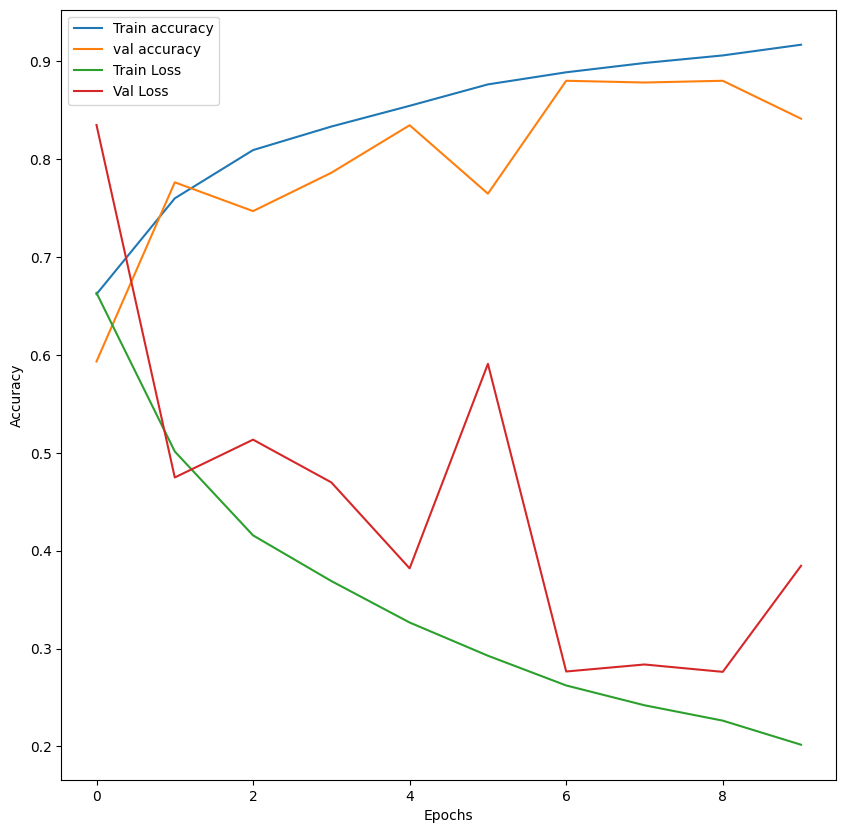

In [34]:
plt.figure(figsize = (10, 10))
plt.plot(cvd.history['accuracy'], label = 'Train accuracy')
plt.plot(cvd.history['val_accuracy'], label = 'val accuracy')
plt.plot(cvd.history['loss'], label = 'Train Loss')
plt.plot(cvd.history['val_loss'], label = 'Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


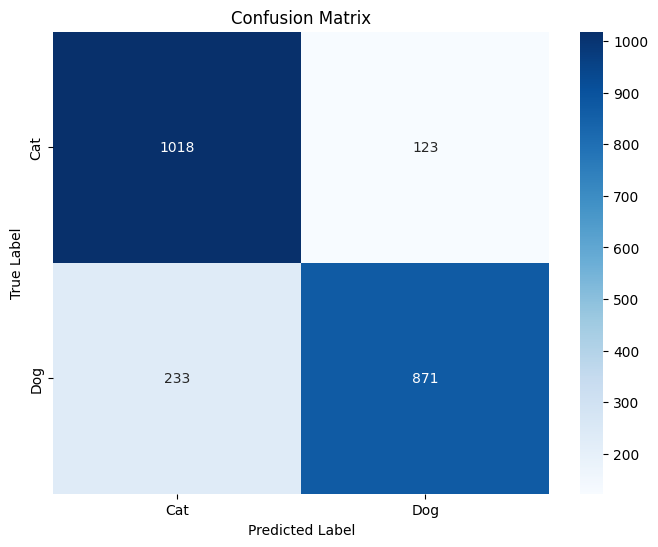

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Obtain predictions on the validation set
y_pred = model.predict(x_val)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Cat", "Dog"],
            yticklabels=["Cat", "Dog"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [8]:
from IPython.display import display
import ipywidgets as widgets
from PIL import Image
import io

# Function to handle file upload and classification
def classify_image(change):
    uploaded_file = upload_button.value
    image = Image.open(io.BytesIO(uploaded_file['content']))
    
    # Preprocess the image (resize, normalize, etc.)
    # For example:
    # image = image.resize((100, 100))
    # image = np.array(image) / 255.0  # Normalize pixel values
    
    # Use your binary classification model to predict
    # For example:
    # prediction = model.predict(image)
    # result = "Cat" if prediction == 0 else "Dog"
    
    # Display the result
    # result_label.value = f"Predicted: {result}"

# Create file upload button
upload_button = widgets.FileUpload(description='Upload Image', accept='.jpg,.png')

# Display output label
# result_label = widgets.Label()

# Call classify_image function when file is uploaded
upload_button.observe(classify_image, names='value')

# Display interface
display(upload_button)
# display(result_label)  # Uncomment this line if you want to display the classification result

FileUpload(value=(), accept='.jpg,.png', description='Upload Image')